# Spin 1/2 particle in a magnetic field

Saumya Biswas (sbiswas4@umd.edu)

For more information about QuTiP see [http://qutip.org](http://qutip.org)
We introduce the basic functionality of QuTiPs Lattice1d class of the lattice module for calculation of Berry phase.

In [8]:
from qutip import *
from qutip_lattice import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import numpy as np

The Chern number is:
-5.0256418349570355e-16
The chern nuber of two filled bands is 0. Nonzero chern number can be found in the gap. The only gap is between the two bands.
To calculate the chern numbers of 1 filled band, the number of occupied band(max_occ) would be 1.


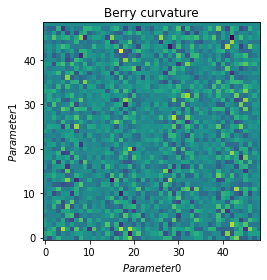

In [11]:
N = 50
thetas = np.linspace(0, np.pi, N)
phis = np.linspace(0, 2*np.pi, N)
eigfs = np.zeros((N, N, 2, 2), dtype=complex)
for i in range(N):
    for j in range(N):
        # H = B.sigma, sigma is vector of Pauli matrices
        H = sigmax() * np.sin(thetas[i]) * np.cos(phis[j]) + sigmay() * np.sin(thetas[i]) * np.sin(phis[j]) + np.cos(thetas[i]) * sigmaz()
        H = -H             #Figure this out please
        _, eigs = np.linalg.eigh(H)
        eigs=eigs.T        # the eigenvectors need to be rows in eigfs
        eigfs[i, j, :, :] = eigs[:, :]
b_curv = berry_curvature(eigfs)
plot_berry_curvature(eigfs)

print('The Chern number is:')
print(b_curv.sum()/2/np.pi )
print('The chern nuber of two filled bands is 0. Nonzero chern number can be found in the gap. The only gap is between the two bands.')
print('To calculate the chern numbers of 1 filled band, the number of occupied band(max_occ) would be 1.')

In [12]:
max_occ = 1
occ_bnds = np.zeros((N,N,max_occ,2),dtype=complex)
for i in range(max_occ):
    occ_bnds[:,:,i,:] = eigfs[:,:,i,:]

In [13]:
print(np.shape(occ_bnds))  

(50, 50, 1, 2)


The Chern number is:
1.0000000000000002


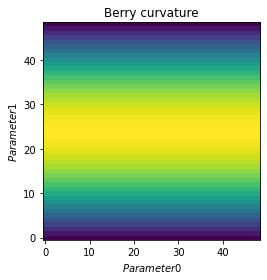

In [14]:
b_curv = berry_curvature(occ_bnds)
plot_berry_curvature(occ_bnds)
print('The Chern number is:')
print(b_curv.sum()/2/np.pi )

All columns of b_curv should be proportional to sin(	heta)


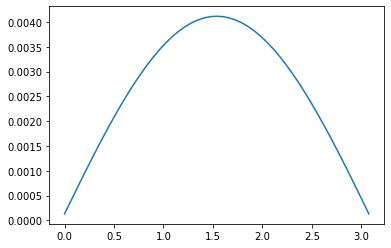

In [15]:
print('All columns of b_curv should be proportional to sin(\theta)')
sinn = b_curv[:,1]
fig, ax = subplots()
ax.plot(thetas[0:N-1], b_curv[:,5]);
show()

All rows of b_curv should be constant


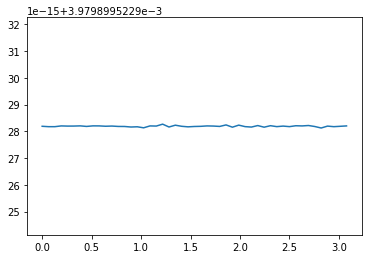

In [16]:
print('All rows of b_curv should be constant')
fig, ax = subplots()
ax.plot(thetas[0:N-1], b_curv[20,:]);
show()

## References

1. "Quantal Phase Factors Accompanying Adiabatic Changes", M. V. Berry
Proceedings of the Royal Society of London. Series A, Mathematical and Physical Sciences
Vol. 392, No. 1802 (Mar. 8, 1984), pp. 45-57 

2. David Griffith's Introduction to Quantum Mechanics (Second Edition), Chapter 10, Section 10.2

In [11]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.0.dev0+2941f20
Numpy Version:      1.19.1
Scipy Version:      1.5.2
Cython Version:     0.29.21
Matplotlib Version: 3.3.1
Python Version:     3.6.13
Number of CPUs:     4
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/qutip_serenity/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `q

In [12]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
